# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
print(combined_data.head())

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Checking the number of mice.
unique_mice = combined_data['Mouse ID'].unique()
print(f"Number of unique mice: {unique_mice}")

249

In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_data = combined_data[combined_data['Mouse ID']. isin(duplicate_mouse_id)]

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop(duplicate_mouse_data.index)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [ ]:
# Checking the number of mice in the clean DataFrame.
unique_mice_clean = clean_data['Mouse ID'].unique()
print(f"Number of unique mice in the clean DataFrame: {unique_mice_clean}")

248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sumamary_stats = grouped_data.agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
sumamary_stats.columns = ['Drug Regimen', 'Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume SEM']
# Assemble the resulting series into a single summary DataFrame.
sumamary_stats.columns = ['Drug Regimen', 'Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume SEM']

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
sumamary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
mean='mean',
median='median',
variance='var',
std_dev='std',
SEM='sem'
).reset_index()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

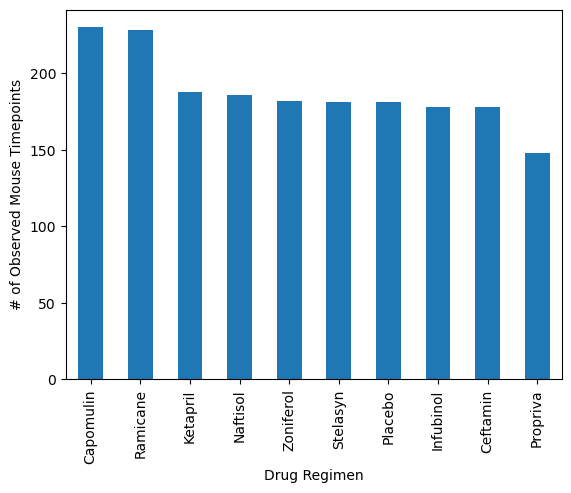

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows_per_regimen = clean_data['Drug Regimen'].value_counts()

# Create the bar plot
total_rows_per_regimen.plot(kind='bar', figsize=(10,6), color='skyblue')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=45)
plt.show()

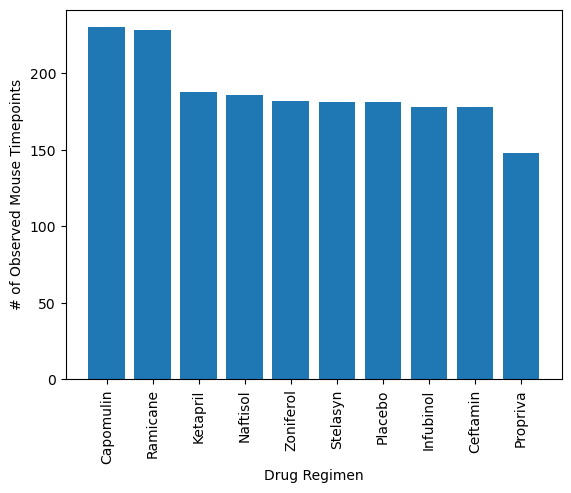

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_rows_per_regimen = clean_data['Drug Regimen'].value_counts()

# Create the bar plot using pyplot
plt.figure(figsize=(10,6))
plt.bar(total_rows_per_regimen.index, total_rows_per_regimen.values, color='skyblue')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=45)
plt.show()

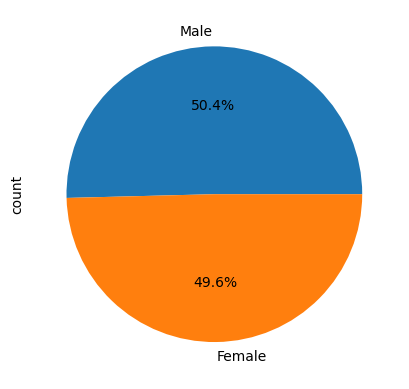

In [ ]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = clean_data.drop_duplicates(subset=['Mouse ID'])

# Get the unique mice with their gender
gender_distribution = unique_mice['sex'].value_counts()
print(gender_distribution)

# Make the pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8), colors=['#ff9999', '#66b3ff'])
plt.title('Distribution of Female vs Male Mice Used in Study')
plt.ylabel('') # Hides the y-axis label
plt.show()

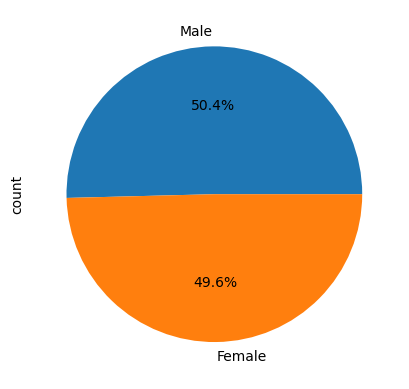

In [ ]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice = clea_data.drop_duplicates(subset=['Mouse ID'])

# Get the unique mice with their gender
gender_distribution = unique_mice['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%, starangle=140', colors=['#ff9999', '#66b3ff'])
plt.title('Distribution of Female vs Male Mice Used in Study')
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
specified_regimens = ['Campomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_data[clean_data['Drug Regimen'].isin(specified_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='left')
print(merged_data.head())

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
tumor_vol_data = {}

for treatment in treatments: 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_data[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data[treatment] = treatment_data

    # Calculate the IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq 

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    print(f"{treatment} potential outliers: {outliers}")

# Display the dictionary
print(tumor_vol_data)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


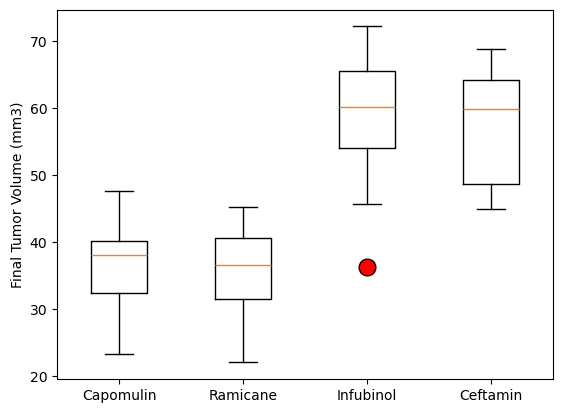

In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Create a list of data for teh box plot
data = [tumor_vol_data[treatment] for treatment in treatments]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=treatments, patch_artist=True,
                        boxprops=dict(facecolor='skyblue', color='black'),
                        whhiskerprops=dict(color='black')
                        capprops=dict(color='black')
                        medianprops = dict(color='red'))

#Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xticks(rotaton=45)
plt.show()

## Line and Scatter Plots

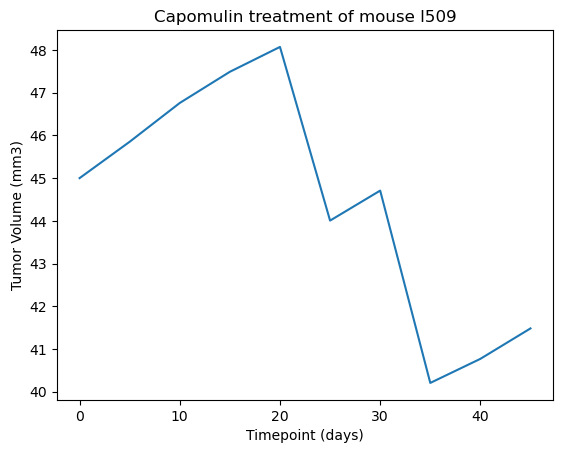

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for mice treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Select a single mouse from the filtered data
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'b742']

# Display the data for the selected mouse
print(single_mouse_data)

# Create the line plot

plt.figure(figsize=(10,6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Timor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time Point for Mouse b742 Treated with Capomulin')
plt.grid(True)
plt.show()

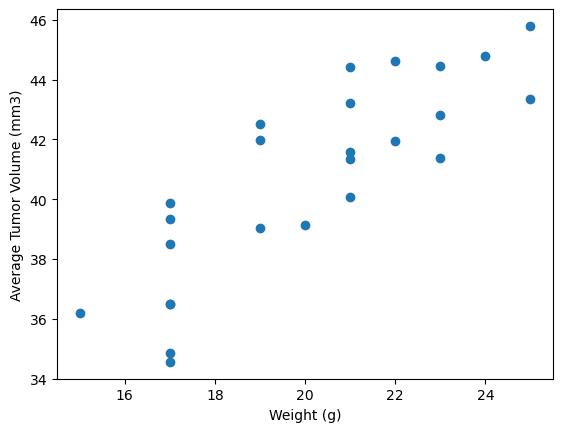

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for mice treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge this with the weight data
merged_data = pd.merge(average_tumor_volume, mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Display the merged data
print(merged_data)

# Create teh scatter plot
plt.figure(figsize=(10,6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Vomume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.grid(True)
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


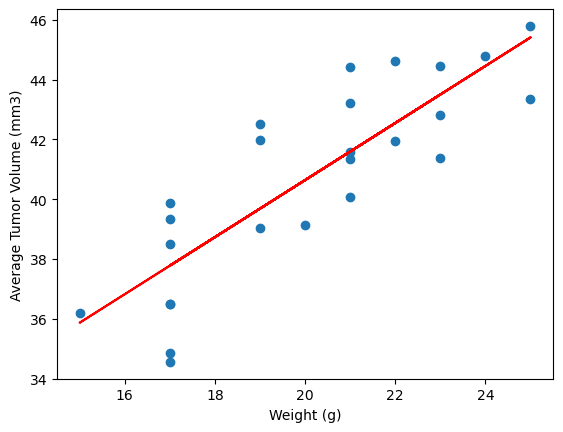

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(merged_data['Weight(g)'], merged_data['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation [0]}")

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err=st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Create a function to predict tumor volume based on weight
def predict_tumor_volume(weight):
    return slope * weight + intercept

# Generate prediction values for plotting
predicted_values = predict_tumor_volume(merged_data['Weight (g)'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', label='Observed Data')
plt.plot(merged_data['Weight (g)'], predicted_values, color='r', label='Fitted Line')

# Add labels and title
plt.xlabel ('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.legend()
plt.grid(True)
plt.show()
